

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [7]:
import pandas as pd
from scipy.stats import ttest_ind

GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Calculating the t_statistic and the corresponding probability for the two independent data samples.  
t_statistic,p_value = ttest_ind(GPU1,GPU2) 

print(t_statistic,p_value)

#Since the p_value is less than 0.05, the Null Hypothesis is rejected. Hence, there is a significant 
#difference in the 2 datasets GPU1 and GPU2.

[-2.62762951] [0.01379428]


## Question 2 
He is trying a third GPU which is GPU3.

In [8]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [13]:
#Now considerting the GPU1 and  GPU3
t_statistic,p_value = ttest_ind(GPU1,GPU3) 

print(t_statistic,p_value)
#Here the p_value(0.14) is greater than 0.05. Hence, both the GPUs GPU1 and GPU3 are similar, i.e both the
#GPUs are taking almost similar times (mean time taken for running the Deep Learning algorithm on a 
#large data on GPU1 and GPU3 are almost same).

[-1.49889438] [0.14509211]


### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [15]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [78]:
from scipy.stats import levene , f_oneway

#Null Hypothesis: There is no difference between the 3 datasets.
#Alternate Hypothesis: There is a significant difference between them (Not[Null Hypothesis])

k=levene(e1,e2,e3)
print(k)
#We found that the p_value is greater than 0.05, which implies, the variances of the data sets 
#are equal.

f,p = f_oneway(e1,e2,e3)
print("f_ststistic: "+str(f))
print("p_value: "+str(p))
# since the p_value is more than 0.05, the Null hypothesis is true and the data sets are similar,
#i.e there is no significant difference b/n the data sets.

LeveneResult(statistic=array([2.67417257]), pvalue=array([0.12259793]))
f_ststistic: [2.51357623]
p_value: [0.13574645]


## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [0]:
TypeI error: Also known as false positive. It is the incorrect rejection of a true null hypothesis.

In [0]:
TypeII error: Also known as false negative. It is the failure to reject a false null hypothesis.

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [26]:
#Null Hypothesis:There is no change in the waiting time to place an order in the past month

In [27]:
#Alternate Hypothesis: There is a change in the waiting time to place an order in the past month.

In [24]:
#Mean Value of waiting time is 4.5 mins.

# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [33]:
from scipy.stats import binom as binom

n=10
p=0.7
k = [0,1,2,3,4,5,6,7]

binom_dist = binom.pmf(k,n,p)


# Question 7 
Plot the distribution created in the above question.

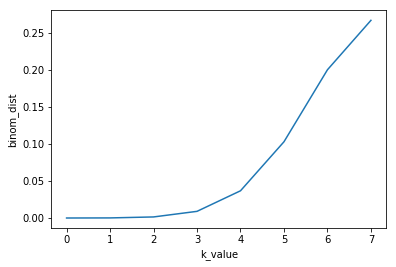

In [37]:
import matplotlib.pyplot as plt

plt.plot(k,binom_dist)
plt.xlabel('k_value')
plt.ylabel('binom_dist')
plt.show()

# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [184]:
import pandas as pd

cd = pd.read_csv("bigcity.csv")
citydata = pd.DataFrame(cd)
#cydt = citydata.drop(citydata.columns[0],axis=1)
#print(cydt)
newcitydata = citydata.iloc[:,1:3]
newcitydata

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe


In [113]:
import numpy as np
newcitydata.shape
X = np.array(newcitydata.iloc[:,0])
Y = np.array(newcitydata.iloc[:,1])
#X = newcitydata.iloc[:,0]
#Y = newcitydata.iloc[:,1]

## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

In [108]:
print(newcitydata[newcitydata.iloc[:,0].isna()])
print(newcitydata[newcitydata.iloc[:,1].isna()])

Empty DataFrame
Columns: [u, x]
Index: []
Empty DataFrame
Columns: [u, x]
Index: []


You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [110]:
newcitydata.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size =0.2)
print("Training sample size for X: "+str(X_train.size)+"    Test sample size for X: "+str(X_test.size))
print("Training sample size for Y: "+str(Y_train.size)+"    Test sample size for Y: "+str(Y_test.size))

Training sample size for X: 39    Test sample size for X: 10
Training sample size for Y: 39    Test sample size for Y: 10


# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

In [117]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
print(reg.coef_)
print(reg.intercept_)

[[1.15816681]]
[8.43106969]


Check: coef_ and intercept_ functions can help you get coefficients & intercept

# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

In [121]:
c = reg.intercept_
m = reg.coef_

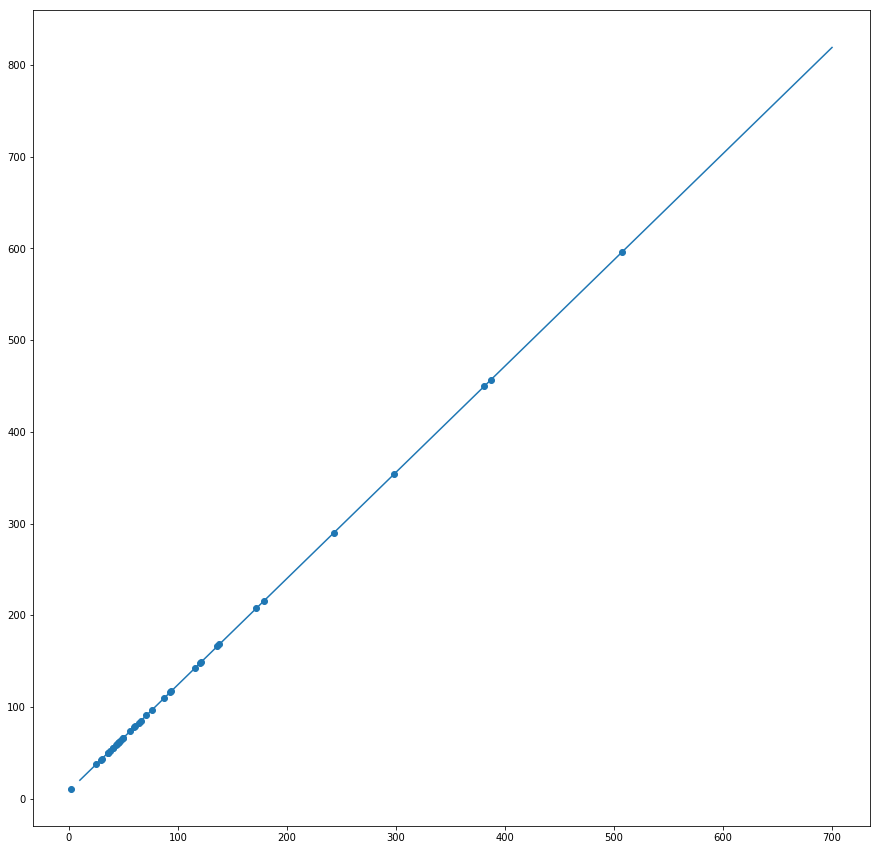

In [159]:
x = np.linspace(10,700,10)
y=m*x+c
y=y.reshape(-1,1)
plt.figure(figsize=(15,15))
plt.scatter(X_train,Y_train)
plt.plot(x, y)
plt.show()

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [0]:
#y_pred = lm.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(Y_test, y_pred)

rmse = sqrt(mse)

In [173]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

x_test = X_test.reshape(-1,1)
Y_new = reg.predict(x_test)
y_test = Y_test.reshape(-1,1)

mse = mean_squared_error(y_test, Y_new)
rmse = sqrt(mse)

print(rmse)

17.051298139927674


## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [178]:
x_train = X_train.reshape(-1,1)
Y_newtrain = reg.predict(x_train)
y_train = Y_train.reshape(-1,1)

r2_valueTrain = reg.score(y_train,Y_newtrain)
r2_valueTrain

0.9223495246980947

In [177]:
#y_train=Y_train.reshape(-1,1)
r2_valueTest = reg.score(y_test,Y_new)
r2_valueTest

0.8014279848533237